# Python| Supervised Machine Learning| Ecommerce | Customer Churn

## Business context
In the competitive world of e-commerce, customer retention is a crucial determinant of long-term success. Our company has observed an alarming trend in user behavior: an increasing number of customers are churning—abandoning their carts, failing to complete purchases, and ceasing interactions altogether. To address this challenge, our initiative focuses on predicting churned users and offering strategic promotions to re-engage them. By understanding the factors that lead to churn, we can not only recover lost revenue but also enhance customer relationships and foster loyalty.

Why Use Machine Learning?

Traditional methods of analyzing churn rates, while valuable, often fall short in capturing the complexities of customer behavior. Machine learning offers a powerful alternative, enabling us to uncover hidden patterns and relationships within large datasets. By leveraging predictive algorithms, we can automate the identification of at-risk customers, allowing us to implement timely and targeted engagement strategies. This proactive approach not only enhances our agility in responding to churn signals but also provides a scalable solution that evolves alongside changing customer behaviors.

## Preprocessing

### Loading data

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('churn_prediction.xlsx')

# Display the first few rows of the dataset
print(df.head())

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

## EDA

In [ ]:
# Display summary statistics
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Numerical Column Analysis

CustomerID
*   Count: 5,630 unique customers.
Note: This variable is not predictive of churn and primarily serves as an identifier.

Churn (this can be considered a numerical column in machine learning context)
*   Mean: a relatively low mean (0.168), indicating that about 16.8% of the customers are considered churned.
*   Implication: Important for modeling to understand customer retention.

CityTier
*   Mean: Approximately 1.65, suggesting that most customers are from urban areas (typically tier 1).
*   Max: The maximum value is 3, suggesting three categories of city tiers.
*   Implication: May relate to service or product accessibility, worth exploring in relation to churn.



Tenure
*   Mean: Approximately 10.19 months, with a wide range of tenure (0 to 61 months).
*   Std Dev: 8.56 months, indicating significant variability in customer tenure.
*   Implication: Longer tenure may correlate with retention; investigate its effect on churn.

WarehouseToHome
*   Mean Distance: About 15.64 (in unspecified units, likely km).
*   Range: From 5 to 127, indicating substantial variance in customer locations.
*   Implication: Distance may affect delivery perceptions; analyze its relationship with churn.

HourSpendOnApp
*   Mean: About 2.93 hours spent on the app, indicating moderate engagement.
*   Min: Equal to 0, indicating misclick? Might remove zero to access the true min hours.
*   Max: Up to 5 hours, suggesting a ceiling in user engagement.
*   Implication: Higher engagement might be correlated with lower churn—an area for targeted marketing.

NumberOfDeviceRegistered
*   Mean: Approximately 3.69 devices per customer.
*   Max: 6 devices, indicating some users engage across multiple platforms, which may enhance interaction.
*   Implication: Device diversity could correlate with retention; explore further.

SatisfactionScore
*   Mean: About 3.07 on a likely 5-point scale, indicating moderate satisfaction.
*   Std Dev: 1.38 suggests moderate variability in customer experiences, not reaching the max score.
*   Implication: Satisfaction may influence churn; further investigation is warranted, especially given some satisfied users still churned.

NumberOfAddress
*   Mean: About 4.21 addresses per customer, indicating customer complexity in their transactions.
*   Implication: Multiple addresses may be linked to higher order counts,  spending patterns, or errors in delivery, worth exploring.
Complain
*   Mean: 0.28 complaints per customer, indicating around 28% of customers raised complaints.
*   Implication: Complaints are a potential churn indicator; investigate their impact on retention.

OrderAmountHikeFromLastYear
*   Mean: Approximately 15.71% increase in order amount, suggesting growth among returning customers.
*   Implication: Higher increases may reduce churn; track this metric closely.

CouponUsed
*   Mean: About 1.75 coupons used per customer, reflecting moderate use of discounts.
*   Implication: Coupon usage could be a churn mitigator; explore its correlation with retention.

OrderCount
*   Mean: Approximately 3.01 orders per month, with significant variance (max 16).
*   Implication: More orders could correlate with lower churn—critical for developing retention strategies.

DaySinceLastOrder
*   Mean: Approximately 4.54 days since the last order, suggesting regular ordering patterns.
*   Std Dev: 3.65, indicating variability.
*   Implication: Longer gaps could indicate churn risk—target campaigns to re-engage inactive users.

CashbackAmount
*   Mean: About 177.22, with a maximum of 324.99.
*   Implication: Cashback amounts are linked to retention; higher cashback might attract repeat customers.

The dataset appears to contain valuable predictors of churn, with significant variability across key metrics. Factors such as tenure, engagement (hours spent on the app), satisfaction scores, and order behavior are particularly promising for modeling customer retention. Additionally, the presence of missing values in several columns suggests that data cleaning and imputation strategies may be necessary before further analysis. Finally, integrating insights from EDA into predictive modeling will enhance our ability to identify at-risk customers effectively.

In [ ]:
filtered_df = df[df['HourSpendOnApp'] > 0] #Conducting an investigation on HourSpendonApp column
filtered_df.reset_index(drop=True, inplace=True)

In [ ]:
filtered_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5372.000000,5372.000000,5108.000000,5372.000000,5121.000000,5372.000000,5372.000000,5372.000000,5372.000000,5372.000000,5107.000000,5116.000000,5115.000000,5066.000000,5372.000000
mean,52883.322226,0.165674,10.407204,1.664371,15.692443,2.933172,3.718354,3.070179,4.275130,0.285927,15.721167,1.790852,3.063343,4.635018,179.513124
std,1623.817779,0.371822,8.572398,0.919782,8.565563,0.718794,1.018254,1.381214,2.582951,0.451897,3.674180,1.899025,2.963257,3.662088,49.187977
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51484.750000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,147.690000
50%,52944.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,165.375000
75%,54287.250000,0.000000,16.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,8.000000,199.422500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
unique_hours_spent = df['HourSpendOnApp'].unique() #There are decimal numbers in the value of HourSpendonApp column, indicating a systematic rounding rule when collecting data. Also, there are roles with "nan" as values.
print(unique_hours_spent)

[ 3.  2. nan  1.  0.  4.  5.]


In [ ]:
nan_count = df['HourSpendOnApp'].isna().sum()

# Display the count of rows with NaN in HourSpendOnApp
print(nan_count)

255


There is some uncertainty regarding the rounding method used in the HourSpendonApp data. It is important to consider that customers may spend varying amounts of time on apps, such as just a few minutes or a full hour plus additional minutes. The presence of '0' hours in the data could be misleading, as it might represent different usage patterns. Therefore, it is necessary to discuss these nuances with the data collector to ensure accurate interpretation of the data. However, in this context, it's not possible to do so, which I would note as a limitation of this project.

In [ ]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Handling missing values
- There are missing values in such numeric columns as Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder.
- The strategy to handle missing values for this project is to impute missing values with statistical measures (mean or median).

To determine whether to use the mean or median as a measure of central tendency, we first need to examine the data for skewness and the presence of outliers. The median is less influenced by outliers and provides a more accurate reflection of the central tendency in skewed distributions. Therefore, assessing the data's characteristics will help us make the appropriate choice.


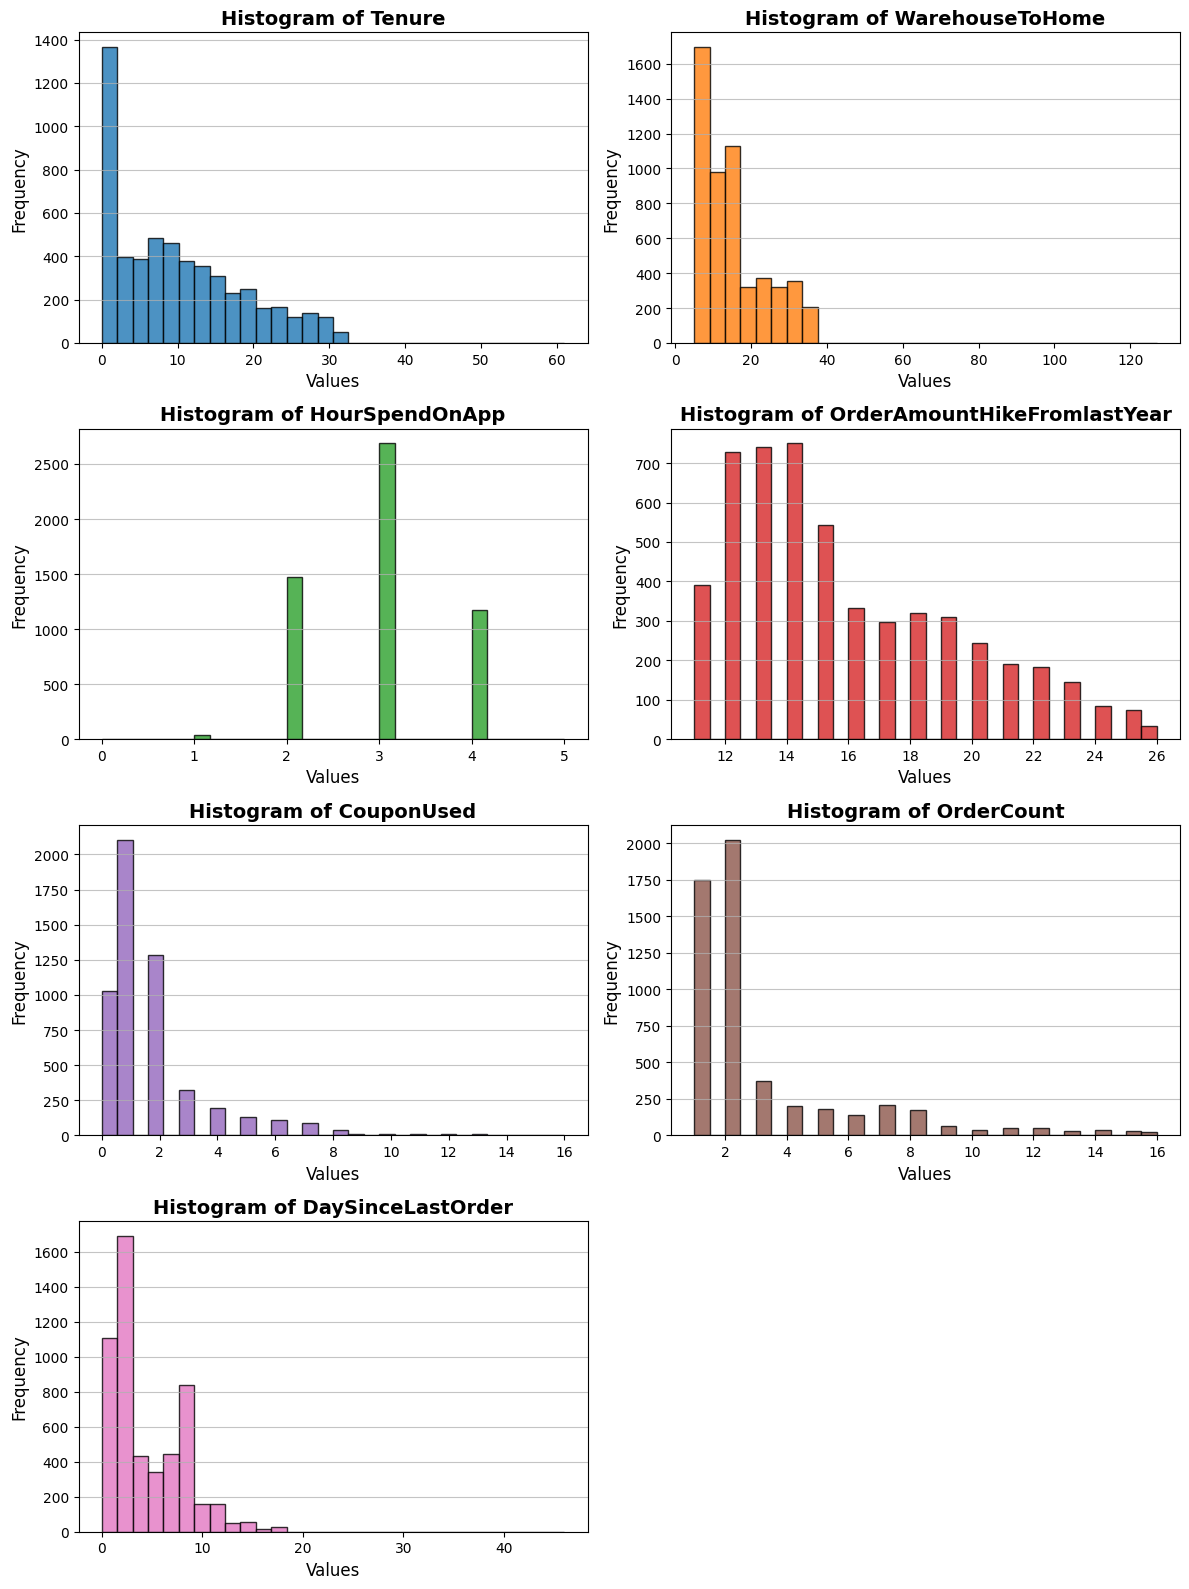

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to check
columns_to_check = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder'
]

# Set the number of rows and columns for subplots
num_columns = len(columns_to_check)
num_rows = (num_columns + 1) // 2  # Two columns per row

# Create subplots
plt.figure(figsize=(12, num_rows * 4))

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']  # Using hex colors

# Loop through each column and plot the histogram
for i, col in enumerate(columns_to_check):
    plt.subplot(num_rows, 2, i + 1)  # Adjust for two columns per row
    plt.hist(df[col].dropna(), bins=30, color=colors[i], edgecolor='black', alpha=0.8)

    plt.title(f'Histogram of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)  # Add grid for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
outlier_columns = []

# Iterate over each column
for col in ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']:

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check for outliers
    if any(df[col] < lower_bound) or any(df[col] > upper_bound):
        outlier_columns.append(col)

if outlier_columns:
    print(f"There are outliers in columns: {', '.join(outlier_columns)}")
else:
    print("No outliers found in any columns.")


There are outliers in columns: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder


Then we should impute median instead.

In [ ]:
from sklearn.impute import SimpleImputer
# select the columns to impute
columns_to_impute = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# create a SimpleImputer object with median strategy
imputer = SimpleImputer(strategy='median')

# fit the imputer to the selected columns and transform the data
imputed_data = imputer.fit_transform(df[columns_to_impute])

# convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)

# replace the original columns with the imputed data
df[columns_to_impute] = imputed_df

In [ ]:
missing_values = df[columns_to_impute].isnull().sum()

print("Missing values in imputed columns:")
print(missing_values)

Missing values in imputed columns:
Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Categorical Columns

<ipython-input-14-fb927dc089c9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=colors)
<ipython-input-14-fb927dc089c9>:19: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x=col, data=df, palette=colors)
<ipython-input-14-fb927dc089c9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=colors)
<ipython-input-14-fb927dc089c9>:19: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=df, palette=colors)
<ipython-input-14-fb927dc089c9>:19: FutureWarning: 

Passing `palette` withou

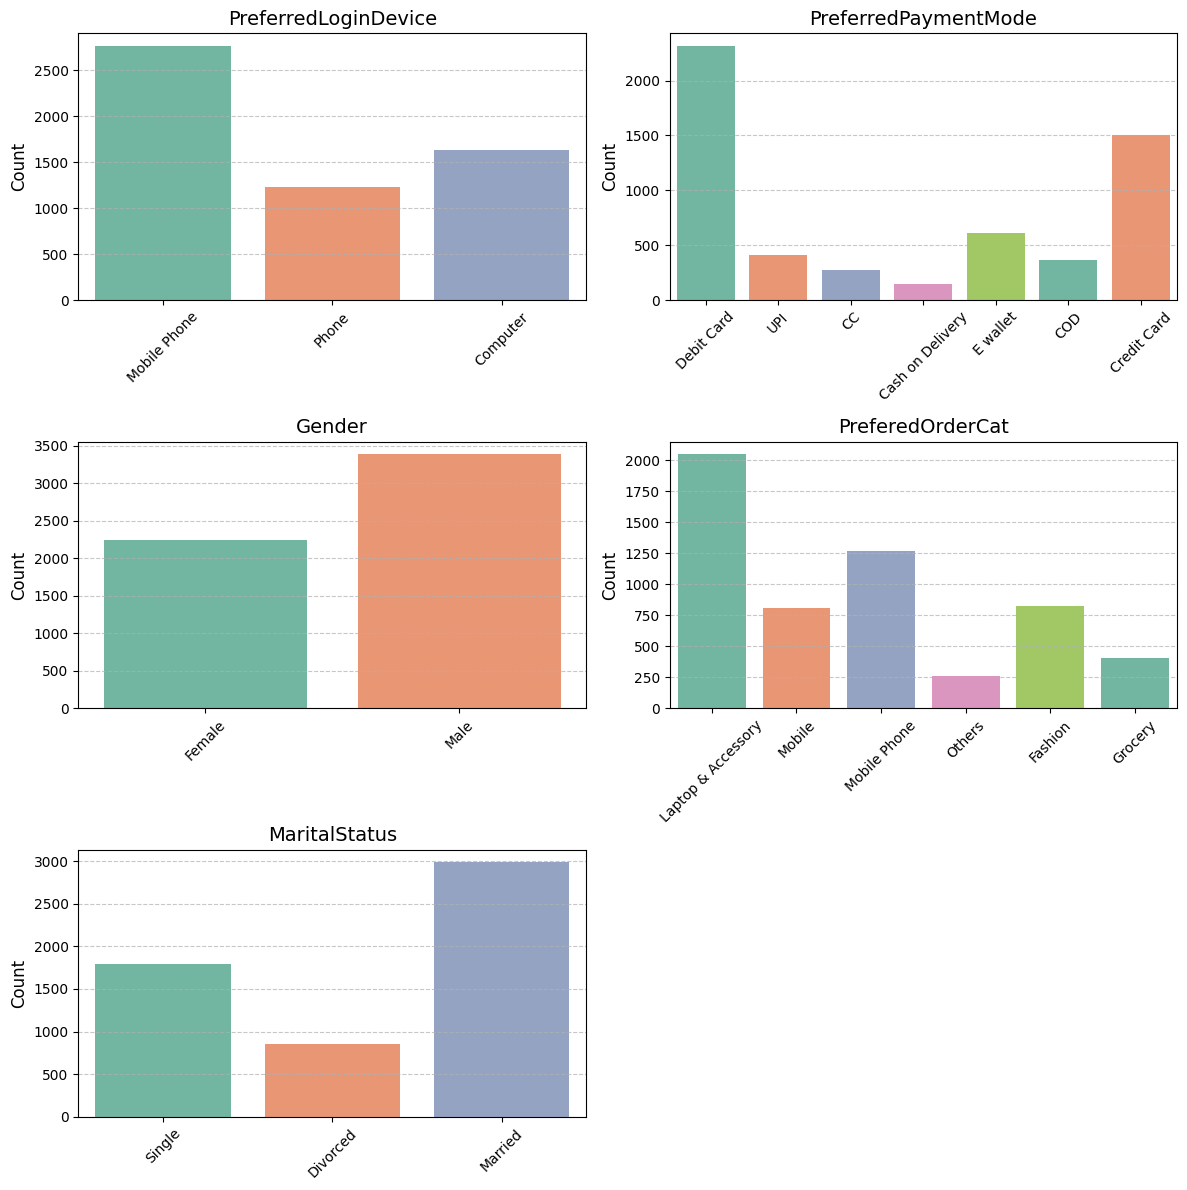

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Set the color palette for all categorical plots
colors = sns.color_palette("Set2", n_colors=len(categorical_cols))

# Create subplots for all categorical distributions
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(12, 12))  # Adjust size as needed

for idx, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, idx + 1)  # Create subplots
    sns.countplot(x=col, data=df, palette=colors)
    plt.title(f'{col}', fontsize=14)  # Concise title
    plt.xlabel('')  # Remove x-axis label for simplicity
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better visibility

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


### Categorical Column Analysis

Preferred Login Device:
- Insights: The majority of customers (49%) prefer to log in using a mobile phone, followed by computers and phones. Note, phone might overlap with mobile phone, which inidcates the domination of phone users.

- Implications: Churning could be related to the device used for logging in. Understanding this pattern may reveal that mobile users face unique challenges or preferences that lead to higher churn rates. This insight could inform the development of mobile-specific features or improvements to enhance user satisfaction.

Preferred Payment mode:
- Insights: The majority of customers (41%) prefer to use debit cards for payment, followed by credit cards, e-wallets, and UPI.

- Implications: Payment preference could indicate customer loyalty and purchase behavior. Understanding which payment methods are associated with high-value transactions can help tailor promotions or offers. Additionally, analyzing churn patterns could uncover whether customers who prefer certain payment methods are more likely to leave, providing an avenue for targeted retention efforts. Besides, payment methods with more churned customers could be targeted for improvements.

Gender
- Insights: The majority of customers (60%) are male, while 40% are female.
- Implications: Gender demographics may influence purchasing behaviors and preferences. Insights into gender-related tendencies can help optimize marketing strategies and product recommendations. Furthermore, understanding any churn correlations within gender groups could reveal opportunities for targeted retention campaigns designed to meet the interests of different customer segments.

Preferred Order Category:
- Insights: The majority of customers (36%) prefer to order laptops and accessories, followed by mobile phones, fashion products, and mobile-related products.
- Implications: Product preferences can guide inventory management and targeted marketing campaigns. Recognizing that a significant portion of customers prefers laptops and accessories indicates the necessity to tailor promotions or features towards these products. Analyzing order patterns may also help identify if churn is linked to dissatisfaction with certain product categories.

Marital Status
- Insights: The majority of customers (53%) are married, followed by single customers (32%), and divorced customers (15%).
- Implications: Marital status may impact purchasing behavior and lifecycle stages, such as family-oriented product needs. Understanding these dynamics can lead to personalized marketing strategies and product offerings. It’s also worth examining whether marital status correlates with churn rates to inform retention strategies that address the specific needs of different customer segments.

### Correlation Analysis

                               Tenure  WarehouseToHome  HourSpendOnApp  \
Tenure                       1.000000        -0.012191       -0.017282   
WarehouseToHome             -0.012191         1.000000        0.064069   
HourSpendOnApp              -0.017282         0.064069        1.000000   
OrderAmountHikeFromlastYear -0.005542         0.038311        0.099305   
CouponUsed                   0.101535         0.002675        0.187166   
OrderCount                   0.165339         0.000354        0.102053   
DaySinceLastOrder            0.174378         0.020253        0.061213   
CashbackAmount               0.467986         0.000415        0.114286   
Churn                       -0.337831         0.069544        0.018816   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Tenure                                         -0.005542    0.101535   
WarehouseToHome                                 0.038311    0.002675   
HourSpendOnApp                             

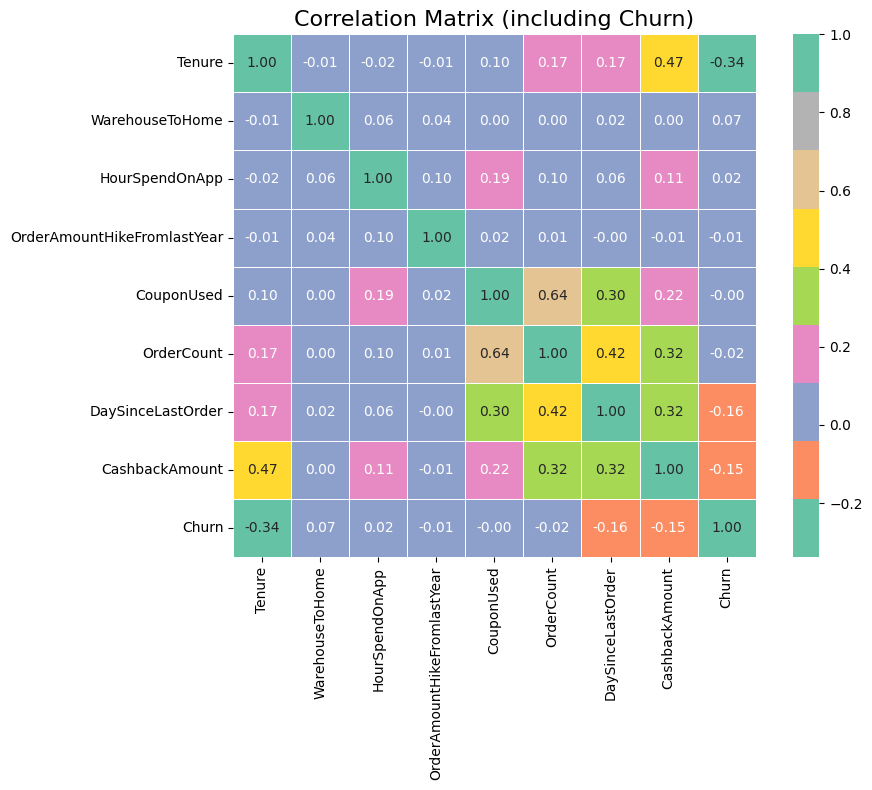

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your numerical columns
numerical_cols = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount',
    'Churn'
]


# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))

# Create a heatmap with the Set2 color palette
colors = sns.color_palette("Set2", n_colors=10)  # Ensure you have enough colors
sns.heatmap(corr_matrix, annot=True, cmap=colors[:len(corr_matrix)], square=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix (including Churn)', fontsize=16)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Strong correlations (> 0.5)
- Churn and Tenure (-0.34): There is a strong negative correlation of -0.34 between Tenure and Churn, indicating that customers who have a shorter tenure with us are more likely to churn. In other words, the less time a customer stays, the higher the probability that they will leave.

- CashbackAmount and Tenure (0.467986): There's a  positive correlation between the cashback amount and the tenure of a customer. This suggests that customers who have been with the company longer tend to receive more cashback.

- OrderCount and CouponUsed (0.641178): There's a strong positive correlation between the number of orders and the usage of coupons. This implies that customers who use coupons tend to make more orders. This indicates a good incentive to retain customers.

Moderate correlations (0.3 to 0.5)
- Churn and DaySinceLastOrder (-0.16): There is a moderate negative correlation between these two variables, suggesting that customers who take longer to place their next order are more likely to churn.

- Churn and CashbackAmount (-0.15): A moderate negative correlation exists here as well, indicating that customers who receive lower cashback amounts are more likely to churn.

- HourSpendOnApp and CouponUsed (0.187166): There's a moderate positive correlation between the time spent on the app and the usage of coupons. This suggests that customers who spend more time on the app are more likely to use coupons.

- DaySinceLastOrder and CashbackAmount (0.316568): There's a moderate positive correlation between the time since the last order and the cashback amount. This implies that customers who have a longer time since their last order tend to receive more cashback. Is this detrimental in a way?

Weak correlations (< 0.3)

- WarehouseToHome and HourSpendOnApp (0.064069): There's a weak positive correlation between the warehouse-to-home time and the time spent on the app. This suggests that there's not a strong relationship between these two variables.

- OrderAmountHikeFromlastYear and CouponUsed (0.024482): There's a weak positive correlation between the order amount hike from last year and the usage of coupons. This implies that there's not a strong relationship between these two variables.

Insights and potential actions

- Targeted marketing: Identify customers who have been with the company longer and offer them more cashback opportunities to increase loyalty.

- Coupon strategy: Analyze the coupon usage pattern and consider offering targeted coupons to customers who are more likely to use them (e.g., those who spend more time on the app).

- App engagement: Investigate ways to increase engagement on the app, as it's correlated with coupon usage and potentially other desirable behaviors. Gamification for coupon is a good example for this case.

### Churn vs Categorical Columns

In [ ]:
churn_freq = df['Churn'].value_counts()

print(churn_freq)

Churn
0    4682
1     948
Name: count, dtype: int64


948 customers have churned and 4682 are staying with us

<ipython-input-18-60b6b3ec3d4d>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette='Set2', ci=None)
<ipython-input-18-60b6b3ec3d4d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette='Set2', ci=None)
<ipython-input-18-60b6b3ec3d4d>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette='Set2', ci=None)
<ipython-input-18-60b6b3ec3d4d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percen

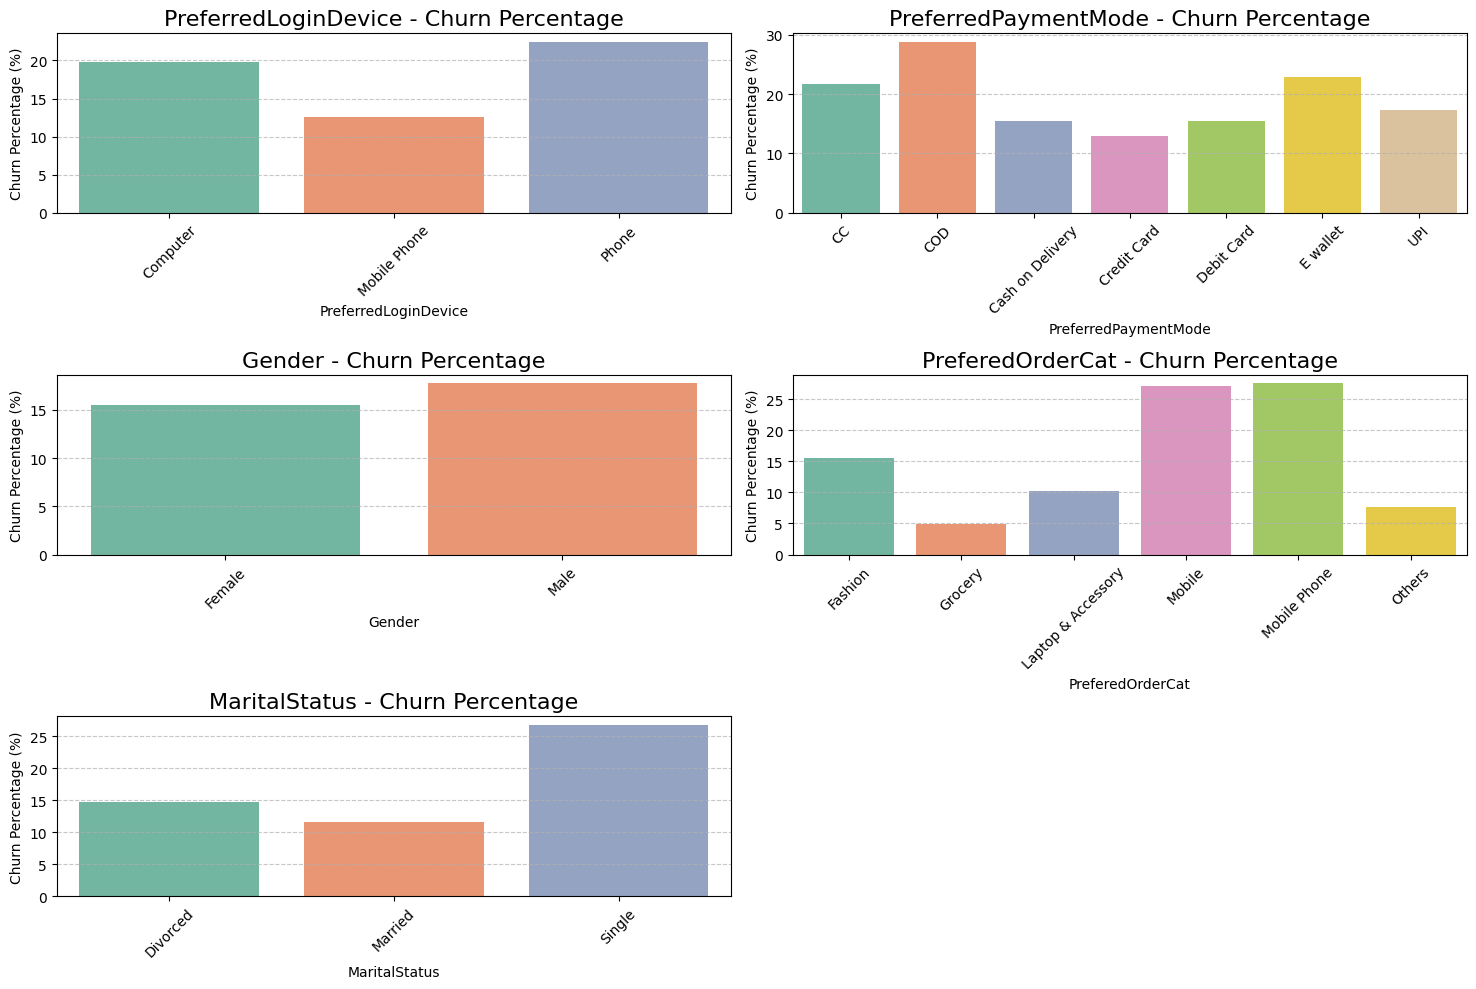

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_cols = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'Gender',
    'PreferedOrderCat',
    'MaritalStatus'
]

# Create a function to visualize churn percentage for each categorical variable
def plot_churn_by_category(df, categorical_cols):
    plt.figure(figsize=(15, 10))  # Adjust size as needed

    for index, col in enumerate(categorical_cols):
        plt.subplot(3, 2, index + 1)  # Create subplots (adjust the grid size as needed)

        # Calculate the churn percentage for each category
        churn_percentage = df.groupby(col)['Churn'].mean() * 100  # Change 'Churn' with your actual churn column name if needed

        # Create a bar plot with percentages
        sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette='Set2', ci=None)

        plt.title(f'{col} - Churn Percentage', fontsize=16)  # Title indicating the churn percentage per category
        plt.xlabel(col)  # X-axis label
        plt.ylabel('Churn Percentage (%)')  # Y-axis label
        plt.xticks(rotation=45)  # Rotate labels for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better visibility

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Call the function to plot churn percentage by category
plot_churn_by_category(df, categorical_cols)


- Preferred Login Device: Phone users are experiencing higher churn rates compared to computer users.

- Preferred Payment Mode: Users who prefer Cash on Delivery (COD), Credit Card (CC), and E-wallets are showing signs of increased churn.

- Gender: Male users are churning at a higher rate, although the difference compared to female users is not statistically significant.

- Preferred Order Category: Customers who purchase in the Mobile Phone, Mobile, and Fashion categories are exhibiting increased churn, warranting a closer examination of these segments.

- Marital Status: Single users are churning at a significantly higher rate than their married counterparts.


## Building Machine Learning Model

### Data Preprocessing and Distribution Checking for Supervised Learning
In the initial stages of building a supervised learning model, it is essential to follow these steps:

- Dataset Splitting: Begin by dividing the dataset into training and test sets to ensure that the model can be evaluated properly.

- Encoding Categorical Variables: Convert categorical columns into numerical values. This is crucial because most machine learning algorithms operate on numerical data.

- Normalization of Numerical Values: Normalize the numerical columns to bring them onto a similar scale, which can improve model training stability and performance.

- Handling Imbalanced Distributions: It is critical to address any imbalanced distributions in the dataset, particularly in classification tasks. This can significantly impact:

- Model Performance: If the model is trained on imbalanced data, it can lead to poor predictions and ultimately result in revenue loss.
- Analyzing Churn Column Distribution: Specifically check the distribution of the Churn column to understand the balance between classes (e.g., churned vs. non-churned) and take appropriate actions if imbalances are detected.

#### Dataset Splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Define categorical variables
categorical_cols = [
    'PreferredLoginDevice',
    'CityTier',
    'PreferredPaymentMode',
    'Gender',
    'PreferedOrderCat',
    'MaritalStatus'
]

# Step 2: Separate features and target variable
X = df.drop(['Churn', 'CustomerID'], axis=1)  # Drop the target variable and any non-feature columns
y = df['Churn']  # Target variable

# Print columns to check after dropping
print("Columns in X after dropping 'Churn' and 'CustomerID':", X.columns)

# Step 3: Check for existence of categorical columns in the features
missing_cols = [col for col in categorical_cols if col not in X.columns]
if missing_cols:
    # Instead of raising KeyError, print and potentially fix
    print(f"Warning: The following expected categorical columns are missing from X: {missing_cols}")

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Test target set shape:", y_test.shape)


Columns in X after dropping 'Churn' and 'CustomerID': Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')
Training feature set shape: (4504, 29)
Test feature set shape: (1126, 29)
Training target set shape: (4504,)
Test ta

#### Normalizing numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizing
scaler = StandardScaler()

# Specify the numerical columns to normalize
numerical_cols = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

# Fit the scaler only on the training data and transform the training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the test data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# You can verify normalization by checking the mean and std of normalized training data
print("Normalized training data:")
print(X_train[numerical_cols].describe())


Normalized training data:
             Tenure  WarehouseToHome  HourSpendOnApp  \
count  4.504000e+03     4.504000e+03    4.504000e+03   
mean   9.465489e-18     2.050856e-17    1.183186e-17   
std    1.000111e+00     1.000111e+00    1.000111e+00   
min   -1.213479e+00    -1.284681e+00   -4.159600e+00   
25%   -8.541188e-01    -8.018232e-01   -1.325711e+00   
50%   -1.353984e-01    -1.982514e-01    9.123310e-02   
75%    5.833220e-01     5.260349e-01    9.123310e-02   
max    6.093512e+00     1.344247e+01    2.925122e+00   

       OrderAmountHikeFromlastYear    CouponUsed    OrderCount  \
count                 4.504000e+03  4.504000e+03  4.504000e+03   
mean                 -2.839647e-17 -3.155163e-18 -1.735340e-17   
std                   1.000111e+00  1.000111e+00  1.000111e+00   
min                  -1.304198e+00 -9.265005e-01 -6.835709e-01   
25%                  -7.473050e-01 -3.873586e-01 -6.835709e-01   
50%                  -1.904119e-01 -3.873586e-01 -3.283790e-01   
75%    

The means are close to zero, indicating a successful normalization process.

#### Handling imbalanced distribution
The data distribution is considered balanced when the percentage of value 1 falls between 20% and 40%. Currently, this is not the case, so I'll need to adjust the data accordingly to achieve a more balanced distribution.

In order to deal with unbalanced dataset, I will use oversampling method to adjust the balance. This means making more copies of the minority class (churn = 1) so that it has more instances. A popular method for this is called SMOTE, which creates synthetic examples rather than just duplicating existing ones.


Churn Flag Distribution:
Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64


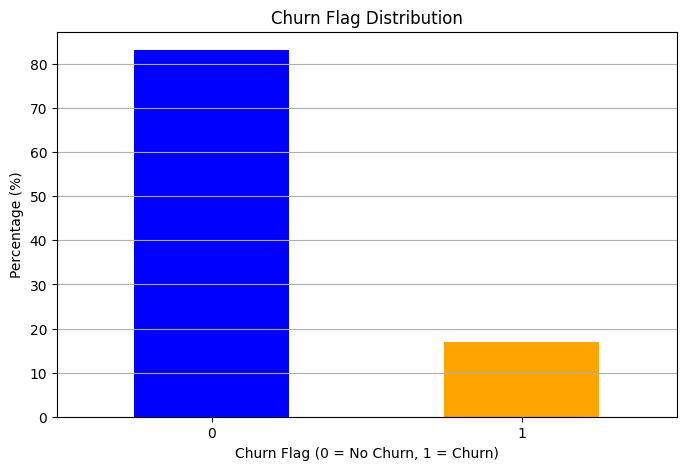

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts(normalize=True) * 100

# Print the percentage of each class
print("Churn Flag Distribution:")
print(churn_counts)

# Plotting the distribution
plt.figure(figsize=(8, 5))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Flag Distribution')
plt.xlabel('Churn Flag (0 = No Churn, 1 = Churn)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assume df is already loaded
# Step 1: Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)  # One-Hot Encoding

# Define features and target variable
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Step 2: Split your dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Normalize the numerical columns
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=['float64', 'int']).columns  # Automatically get numerical columns

# Fit the scaler and transform the training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# Transform the test data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Step 4: Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Training set class distribution after SMOTE:")
print(y_resampled.value_counts())


Training set class distribution after SMOTE:
Churn
0    3746
1    3746
Name: count, dtype: int64


### Model Comparison and Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),  # Increased max_iter for convergence
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC())
]

# Define the Cross-Validation strategy
cv = 5  # 5-fold Cross-Validation

# Create a dictionary to store the results
results = {}

# Create a scorer for balanced accuracy
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Iterate over the models
for name, model in models:
    # Perform Cross-Validation with balanced accuracy
    scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring=balanced_accuracy_scorer)
    results[name] = scores.mean()

# Print the results in a nice format
print("Model Comparison (Balanced Accuracy):")
print("----------------")
for name, score in results.items():
    print(f"{name.ljust(25)}: {score:.3f}")


Model Comparison (Balanced Accuracy):
----------------
Logistic Regression      : 0.848
Decision Tree            : 0.933
Random Forest            : 0.973
Gradient Boosting        : 0.912
Support Vector Machine   : 0.936


There are 6 steps executed in the code:

1. Import: The code begins by importing several machine learning models from sklearn, including:
- RandomForestClassifier: An ensemble method using multiple decision trees.
- LogisticRegression: A simple linear model for binary classification.
- DecisionTreeClassifier: A model that makes decisions based on tree-like splits.
- GradientBoostingClassifier: An ensemble method that builds trees in sequence to improve the model.
- SVC: Support Vector Classifier, effective for classification tasks.
It also imports cross_val_score for cross-validation, as well as functions for calculating balanced accuracy.


2. Define the Models
- The code defines a list called models, which contains tuples for each machine learning model. Each tuple consists of:
- A string name of the model.
- An instance of the model.
Notably, max_iter=1000 is set for LogisticRegression to ensure convergence for complex datasets.


3. Define Cross-Validation Strategy:

The number of folds for cross-validation is set to 5 with cv = 5, meaning the dataset will be split into 5 parts, training on 4 and testing on 1 in each iteration.

4. Create Results Dictionary:

An empty dictionary named results is initialized to store the performance results of each model after evaluation.

5. Create Scorer for Balanced Accuracy:

A scorer is created using make_scorer and balanced_accuracy_score. This ensures that the model evaluation takes into account the imbalanced nature of the dataset.

6. Iterate Over the Models:

The code loops through each model in the models list to evaluate its performance



In this selection process, I utilize the metric of balanced accuracy instead of the accuracy as the dataset is not balanced as it ensures both classes are fairly represented.

The result presented means that Random Forest Classifier is our go-to model for this dataset. Random Forest Classifier is like a democracy of decision trees. It takes the wisdom of many trees to make better, more accurate predictions. It is powerful for both classification and regression tasks and works well with both small and large datasets.

### Building model

In [ ]:
# Build a random forest classifier model (based on the best model from the comparison)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9671403197158082
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       936
           1       0.98      0.82      0.89       190

    accuracy                           0.97      1126
   macro avg       0.97      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126

Confusion Matrix:
[[933   3]
 [ 34 156]]


### Intepretation
#### Accuracy: 0.9671

This means that the model correctly classified approximately 96.71% of all instances (total predictions) in the test dataset. In this case, the model performed very well overall.

#### Classificiation Report
For class 0 (non-churned):

- Precision: Out of all instances labeled as 0 (non-churned) by the model, 96% were actually non-churned. High precision indicates that the model has a low false positive rate.
- Recall: Of all actual non-churned instances, the model correctly identified 100% of them. This shows that the model captured all non-churned customers without missing any.
- F1-score: This combines precision and recall into a single metric, and a score of 0.98 is excellent since it indicates a good balance between precision and recall.
- Support: There were 936 actual instances of class 0 (non-churned).

For class 1 (churned):

- Precision: Of all instances labeled as 1 (churned), 98% were correct. This indicates very few customers who were not churned were misclassified as churned (low false positive rate).
- Recall: Of all actual churned instances, the model correctly identified 82%. This is relatively good but indicates that some churned customers were missed (higher false negative rate).
- F1-score: This score reflects the trade-off between precision and recall for the churned class. While good, it suggests that there is room for improvement (recall could be increased).

- Support: There were 190 actual instances of class 1 (churned).

#### Confusion Matrix

The confusion matrix shows:

- True Negatives (TN): 933 - Correctly predicted non-churned (class 0).
- False Positives (FP): 3 - Incorrectly predicted as churned (class 1) when they were not (class 0).
- False Negatives (FN): 34 - Missed churned customers (class 1) predicted as non-churned (class 0).
- True Positives (TP): 156 - Correctly predicted churned customers (class 1).

### Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replaced 'auto' with legitimate options
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='balanced_accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
